<a href="https://colab.research.google.com/github/aliar5/Machine-Learning-Engineering/blob/main/HW4Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


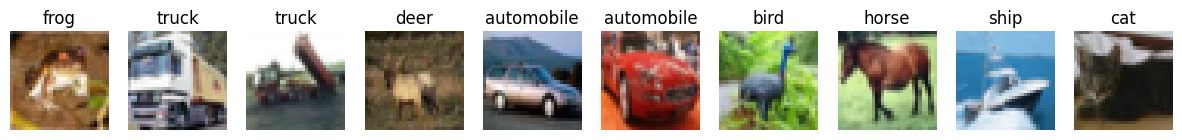

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.2752 - loss: 2.0365 - val_accuracy: 0.4061 - val_loss: 1.6727
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.3886 - loss: 1.7044 - val_accuracy: 0.4270 - val_loss: 1.5975
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.4341 - loss: 1.5873 - val_accuracy: 0.4529 - val_loss: 1.5294
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.4571 - loss: 1.5292 - val_accuracy: 0.4731 - val_loss: 1.4882
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4717 - loss: 1.4791 - val_accuracy: 0.4669 - val_loss: 1.4894
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4765 - loss: 1.4651 - val_accuracy: 0.4524 - val_loss: 1.5610
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4933 - loss: 1.4159 - val_accuracy: 0.4725 - val_loss: 1.4787
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.5017 - loss: 1.4051 - 

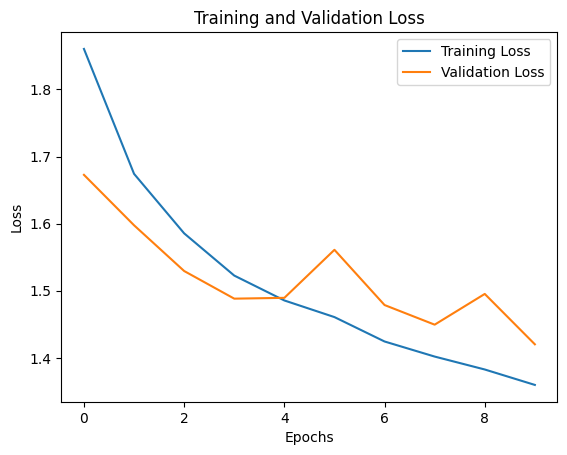

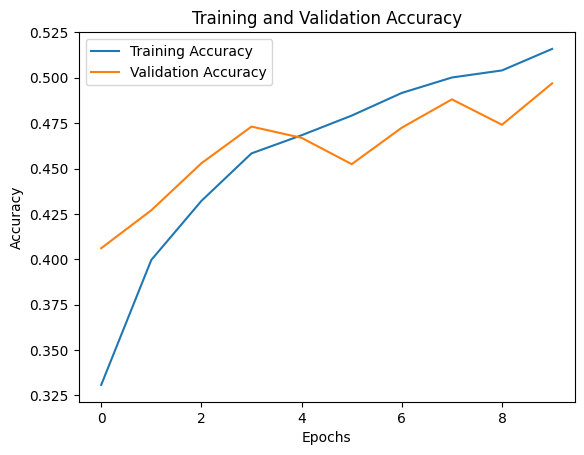

In [1]:
#HW 4 Question 1

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# CIFAR-10 Classes
cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize CIFAR-10 Dataset
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.set_title(cifar_classes[y_train[i][0]])
    ax.axis('off')
plt.show()

# Construct Fully Connected Neural Network for CIFAR-10
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Plot Training & Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()